# Prediction using Supervised ML



## Predict the percentage of an student based on the no. of study hours.
#### ● This is a simple linear regression task as it involves just 2 variables.
#### ● You can use R, Python, SAS Enterprise Miner or any other tool
#### ● Data can be found at http://bit.ly/w-data
#### ● What will be predicted score if a student studies for 9.25 hrs/ day?

# Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 

In [3]:
data = pd.read_csv('http://bit.ly/w-data')

### Let's analyze the data

In [4]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### We can see that there are no null values.

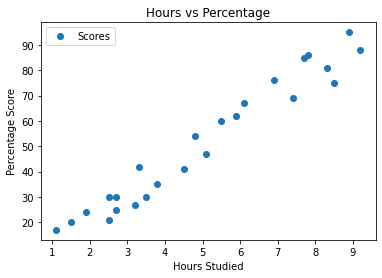

In [ ]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Preparing the data

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

## Splitting the data using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 
 

#Now Let's check out train dataset



In [17]:
from sklearn.linear_model import LinearRegression

In [22]:
mo = LinearRegression()
mo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(mo.intercept_)
print(mo.coef_)

2.018160041434662
[9.91065648]


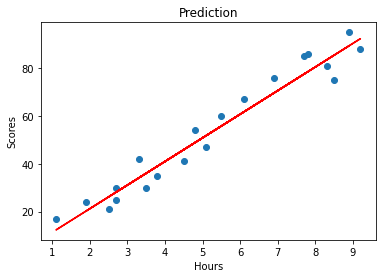

In [24]:
#plotting the regrression line 
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.495142109236383 + 9.87171443*X_train, 'r')
plt.title("Prediction")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#Making Predictions

In [25]:
print(X_test) # Testing data - In Hours
y_pred = mo.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033



Predicting the score for the study hour=9.25

In [27]:
pred_score = mo.predict([[9.25]])
print("The predicted score is :",pred_score)

The predicted score is : [93.69173249]


# Evaluating the Model

In [28]:
from sklearn import metrics  
mae =  metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae
      ) 

Mean Absolute Error: 4.183859899002982


In [29]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.9454906892105354

In [34]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

4.647447612100373

In [35]:
print("Mean absolute error",mae)
print("r squared:", r_squared)
print("RMSE:",rmse)

Mean absolute error 4.183859899002982
r squared: 0.9454906892105354
RMSE: 4.647447612100373
